<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preperation" data-toc-modified-id="Data-file-preperation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preperation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#processed-directory-(all-data-files-produced-in-this-repository)" data-toc-modified-id="processed-directory-(all-data-files-produced-in-this-repository)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>processed</code> directory (all data files produced in this repository)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Power-plant-CO2-Signals" data-toc-modified-id="Power-plant-CO2-Signals-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Power plant CO2 Signals</a></span><ul class="toc-item"><li><span><a href="#Plant-Level" data-toc-modified-id="Plant-Level-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plant Level</a></span></li><li><span><a href="#Technology-Level" data-toc-modified-id="Technology-Level-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Technology Level</a></span></li><li><span><a href="#Country-level" data-toc-modified-id="Country-level-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Country level</a></span></li><li><span><a href="#Signal-analysis" data-toc-modified-id="Signal-analysis-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Signal analysis</a></span></li><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li></ul></li><li><span><a href="#ENTSO-E-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-generation-per-technology-CO2-Signal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ENTSO-E generation per technology CO2 Signal</a></span><ul class="toc-item"><li><span><a href="#EF-preparation" data-toc-modified-id="EF-preparation-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>EF preparation</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li><li><span><a href="#CO2-Duration-Curves" data-toc-modified-id="CO2-Duration-Curves-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>CO2 Duration Curves</a></span></li><li><span><a href="#Carbon-Intensity-Heat-Map" data-toc-modified-id="Carbon-Intensity-Heat-Map-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Carbon Intensity Heat Map</a></span></li></ul></li></ul></li><li><span><a href="#ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format" data-toc-modified-id="ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format</a></span></li><li><span><a href="#ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ENTSO-E Power Stats generation per technology CO2 Signal</a></span></li><li><span><a href="#Compair-Bottom-Up-and-Top-down" data-toc-modified-id="Compair-Bottom-Up-and-Top-down-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Compair Bottom Up and Top down</a></span></li><li><span><a href="#Plotting-CI" data-toc-modified-id="Plotting-CI-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Plotting CI</a></span></li><li><span><a href="#Export-final-CO2-signals" data-toc-modified-id="Export-final-CO2-signals-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Export final CO2 signals</a></span></li></ul></div>

# Introduction

This notebook uses the calculated EFs to design an hourly CO2 emission signal for EU countries.

# Script setup

In [1]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image 
import datetime
from matplotlib.lines import Line2D

#GEO
import geopandas as gpd
#from pyproj import CRS
#from pyproj import Transformer
#from shapely.geometry import Point

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_theme()

#helpers
from helpers import change_ENTSOE_ProductionTypeName

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preperation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type
Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):


 File - > time_series_60min_multiindex.csv - > generation per technology
 
- 2) ENTSO-E production per unit
Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\ember_EF.csv', 'input\\entso.csv', 'input\\entsoe-statistical-factsheet-2018-stacked.csv', 'input\\entso_scaled.csv', 'input\\gen_data_2015.csv', 'input\\gen_data_2016.csv', 'input\\gen_data_2017.csv', 'input\\gen_data_2018.csv', 'input\\Matching', 'input\\MDV_table.csv', 'input\\time_series_60min_multiindex.csv', 'input\\top_down_methode', 'input\\unit_data_2015.csv', 'input\\unit_data_2016.csv', 'input\\unit_data_2017.csv', 'input\\unit_data_2018.csv']


## `processed` directory (all data files produced in this repository)

- 1) EF per type and county

File - > EF_bottom_up_methode.csv

- 2) EF per unit

File -> generation_unit_EF_bottom_up_methode.csv

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(processed_directory_path) :
    print("The directory for the CO2 Signal is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(processed_directory_path, fn) for fn in os.listdir(processed_directory_path)]

print(filenames)

['processed\\CI_bottom_up_methode.csv', 'processed\\CI_top_down_methode.csv', 'processed\\EF_bottom_up_methode.csv', 'processed\\generation_unit_EF_bottom_up_methode.csv', 'processed\\Matching_Entso_EUTL_EU.csv', 'processed\\_CO2_intensity_by_technology.png']


# Load data functions

In [5]:
def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_CO2_data(path, fn):
    """
    Own generation unit information with CO2 information per unit
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # set name for the index
    #df.index.set_names('eic_g', inplace=True)

    return df

def load_EF(path, fn):
    """
    Own generation EF per tech and country
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=[0,1])
    
    return df

def load_timeseries_ENTSOE(path, fn):
    """
    Read generation data from time-series package own modification.


    Parameters
    ----------
    path : TYPE
        DESCRIPTION.
    fn : TYPE
        DESCRIPTION.

    Returns
    -------
    generation : TYPE
        DESCRIPTION.

    """
   
    generation = (pd.read_csv(os.path.join(path, fn), index_col=[0], header=[0, 1], parse_dates=True)
                    .dropna(how="all", axis=0))
       
    
    return generation

# Load data sets

#### Load power plant generation data

In [6]:
generation_per_unit = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant emission info data

In [7]:
generation_unit_info = load_unit_CO2_data(processed_directory_path, 'generation_unit_EF_bottom_up_methode.csv')

#### Load ENTSO-E generation per type

In [8]:
entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'entso_scaled.csv')

#### Load EF per technology

In [9]:
EF = load_EF(processed_directory_path, 'EF_bottom_up_methode.csv')

In [10]:
EF.head(10)

EF Verified_EF
MapCode ProductionTypeName                  
AT      gas                 0.36        True
        hard_coal           1.07        True
BE      gas                 0.39        True
CZ      hard_coal           1.01        True
        lignite             0.93        True
DE      gas                 0.43        True
        hard_coal           0.91        True
        lignite             1.14        True
        other_fossil        1.40        True
DK      gas                 0.46       False

#### Filter generation set to generation info data

In [11]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

# Power plant CO2 Signals

In this section we build CO2 signal out of the used per power plant generation data. We limit the used generation to the generation units where we where able to calculated EFs.

In [ ]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

In [ ]:
generation_per_unit.head(5)

In [ ]:
generation_unit_info.head(5)

## Plant Level

In [ ]:
CO2_emission_per_unit_EF = generation_per_unit.multiply((generation_unit_info.PP_EF2018), axis='columns')

In [ ]:
CO2_emission_per_unit_EF.dropna(axis=1, inplace=True)

In [ ]:
CO2_emission_per_unit_EF.sum(axis=1).describe()

## Technology Level

In [ ]:
CO2_emission_per_tech_EF = generation_per_unit.multiply((generation_unit_info.Tech_EF), axis='columns')

In [ ]:
CO2_emission_per_tech_EF.dropna(axis=1, inplace=True)

In [ ]:
CO2_emission_per_tech_EF.sum(axis=1).describe()

## Country level

In [ ]:
CO2_emission_per_country_EF = generation_per_unit.multiply((generation_unit_info.Country_EF), axis='columns')

In [ ]:
CO2_emission_per_country_EF.dropna(axis=1, inplace=True)

In [ ]:
CO2_emission_per_country_EF.sum(axis=1).describe()

## Signal analysis 

#### Scatter Plot

In [ ]:
Carbon_intensitiy = pd.DataFrame()
Carbon_intensitiy['unit_EF'] = ((CO2_emission_per_unit_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['tech_EF'] = ((CO2_emission_per_tech_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['country_EF'] = ((CO2_emission_per_country_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['diff_norm'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['tech_EF']) / Carbon_intensitiy['tech_EF']

In [ ]:
diff_norm = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['tech_EF']) / Carbon_intensitiy['tech_EF']


In [ ]:
diff_norm

fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="tech_EF", y="diff_norm", ax=ax, alpha=0.6, color='b', s=3)

#Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

#Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("Abweichung in %")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

In [ ]:
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="country_EF", ax=ax, alpha=0.6, color='b', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("g CO2 Emissions / kWh ")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

In [ ]:
Carbon_intensitiy_per_country_unit_EF = ((CO2_emission_per_unit_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum()) / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_tech_EF = (CO2_emission_per_tech_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_country_EF = (CO2_emission_per_country_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()

In [ ]:
n_graphs = len(Carbon_intensitiy_per_country_unit_EF.columns)
n_cols = 5
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_per_country_unit_EF.columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
    
    ax.set(aspect='equal')
    
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_country_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_tech_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_unit_EF.loc[:,country], s=10, ax=ax)
    
        #max_lim = (max(entso_DE.loc[:,tech].max(),generation_DE.loc[:,tech].max())//1000)*1000+1000
        #if max_lim < 0:
        #    max_lim = 0
        
        #min_lim = (min(entso_DE.loc[:,tech].min(),generation_DE.loc[:,tech].min())//1000)*1000-1000
        #if min_lim < 0:
        #    min_lim = 0
    
    ax.set_title(country)
        #ax.set_xlim(min_lim,max_lim)
        #ax.set_ylim(min_lim,max_lim)
        
    ax.set_xlabel("g CO2 Emissions / kWh ")
    ax.set_ylabel("g CO2 Emissions / kWh ")
    
    fig.tight_layout()
    
ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(2.8, 0.5))

#### EF distribution

In [ ]:
# per unit EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(16,6)
ax = sns.violinplot(data=Carbon_intensitiy_per_country_unit_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

In [ ]:
# per tech ef
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_tech_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

In [ ]:
# per country EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_country_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

## CO2 Signal Example

The following plot shows an example of the three generated CO2 Signals

In [ ]:
def plot_production_profile(generation, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generators, countries, start, end):
    
    # load and filter data
    generators = generators[generators.MapCode == countries]
    generation = generation[generators.index]
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF[generators.index]
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF[generators.index]
    CO2_emission_per_country_EF = CO2_emission_per_country_EF[generators.index]
    
    # sum technologies
    generation_car =  generation.groupby(generators.ProductionTypeName, axis=1).sum()
    
    # sum Emissions
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF.sum(axis=1)
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF.sum(axis=1)
    CO2_emission_per_country_EF = CO2_emission_per_country_EF.sum(axis=1)
    
    # Carbon intensity
    Carbon_intensitiy_unit_EF = (CO2_emission_per_unit_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_tech_EF = (CO2_emission_per_tech_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_country_EF = (CO2_emission_per_country_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'onwind': '#235ebc',
              'offwind': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a'}

    generation_car = generation_car.loc[start:end]
    Carbon_intensitiy_unit_EF = Carbon_intensitiy_unit_EF.loc[start:end]
    Carbon_intensitiy_tech_EF = Carbon_intensitiy_tech_EF.loc[start:end]
    Carbon_intensitiy_country_EF = Carbon_intensitiy_country_EF.loc[start:end]


    #order of col
    #cols = ['lignite', 'hard_coal',  'gas']#, 'other_fossil']

    #p_by_carrier = p_by_carrier[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(12,6)

    generation_car.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation_car.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]")
    ax.set_xlabel("Date")
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.5))

    #ax3 = ax.twinx()
    Carbon_intensitiy_unit_EF.plot(ax=ax, secondary_y=True, legend=False)


    Carbon_intensitiy_tech_EF.plot(ax=ax, secondary_y=True, legend=False)

    Carbon_intensitiy_country_EF.plot(ax=ax, secondary_y=True, legend=False)

    ax.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]")

    #ax.set_xlim(0,snapLength-1)
    #ax.set_ylim(0,150000)
    #ax.right_ax.set_ylim(0,0.1)
    plt.tight_layout()
    
    return

In [ ]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

#Carbon_intensitiy_per_country_unit_EF
#Carbon_intensitiy_per_country_tech_EF
#Carbon_intensitiy_per_country_country_EF

plot_production_profile(generation_per_unit, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generation_unit_info, 'DE', start, end)


# ENTSO-E generation per technology CO2 Signal

In this section we using the country specific EF for generating an CO2 emission signal for all EU countries. The production data are based on the production per type data from ENTSO-E

In [12]:
# take a look at the generation data
entsoe_gen_type.head(5)

region                         AT                                      \
variable                  biomass        gas   hard_coal        hydro   
utc_timestamp                                                           
2018-01-01 00:00:00+00:00     0.0  85.185998  189.813350  3633.105979   
2018-01-01 01:00:00+00:00     0.0  83.986195  188.547928  3557.076855   
2018-01-01 02:00:00+00:00     0.0  82.786393  188.547928  3439.774779   
2018-01-01 03:00:00+00:00     0.0  86.385801  188.547928  3432.171866   
2018-01-01 04:00:00+00:00     0.0  89.985209  188.547928  3616.814024   

region                                                                     \
variable                  other_fossil other_renewable solar wind_onshore   
utc_timestamp                                                               
2018-01-01 00:00:00+00:00   376.712329             NaN   0.0   767.537636   
2018-01-01 01:00:00+00:00   376.712329             NaN   0.0   854.254629   
2018-01-01 02:00:00+00:00   376.712329             NaN   0.0   638.384669   
2018-01-01 03:00:00+00:00   376.712329             NaN   0.0   417.902102   
2018-01-01 04:00:00+00:00   376.712329             NaN   0.0   296.129304   

region                             BE               ...           SI  \
variable                      biomass          gas  ... wind_onshore   
utc_timestamp                                       ...                
2018-01-01 00:00:00+00:00  310.564338  1486.203046  ...          0.0   
2018-01-01 01:00:00+00:00  205.181412  1551.580523  ...          0.0   
2018-01-01 02:00:00+00:00  178.621922  1538.055173  ...          0.0   
2018-01-01 03:00:00+00:00  175.522424  1501.492141  ...          0.0   
2018-01-01 04:00:00+00:00  175.362106  1515.711098  ...          0.0   

region                            SK                                     \
variable                     biomass         gas  hard_coal       hydro   
utc_timestamp                                                             
2018-01-01 00:00:00+00:00  75.757569  223.815846  71.307423  490.635794   
2018-01-01 01:00:00+00:00  75.488926  220.374486  71.159174  497.114042   
2018-01-01 02:00:00+00:00  75.488926  206.609047  69.231947  552.469700   
2018-01-01 03:00:00+00:00  79.787227  178.823253  67.156471  632.576139   
2018-01-01 04:00:00+00:00  79.249940  182.901901  68.787202  605.737684   

region                                                           \
variable                      lignite      nuclear other_fossil   
utc_timestamp                                                     
2018-01-01 00:00:00+00:00  174.510973  1707.038703   127.939921   
2018-01-01 01:00:00+00:00  172.955443  1704.599138   127.138292   
2018-01-01 02:00:00+00:00  169.844384  1697.092784   125.454872   
2018-01-01 03:00:00+00:00  163.816707  1692.307483   121.740660   
2018-01-01 04:00:00+00:00  165.858340  1697.468101   123.317196   

region                                           
variable                  other_renewable solar  
utc_timestamp                                    
2018-01-01 00:00:00+00:00             0.0   0.0  
2018-01-01 01:00:00+00:00             0.0   0.0  
2018-01-01 02:00:00+00:00             0.0   0.0  
2018-01-01 03:00:00+00:00             0.0   0.0  
2018-01-01 04:00:00+00:00             0.0   0.0  

[5 rows x 200 columns]

## EF preparation 

In [13]:
EF

EF Verified_EF
MapCode ProductionTypeName                  
AT      gas                 0.36        True
        hard_coal           1.07        True
BE      gas                 0.39        True
CZ      hard_coal           1.01        True
        lignite             0.93        True
DE      gas                 0.43        True
        hard_coal           0.91        True
        lignite             1.14        True
        other_fossil        1.40        True
DK      gas                 0.46       False
        hard_coal           0.96        True
ES      gas                 0.39        True
        hard_coal           0.98        True
FI      gas                 0.43        True
        hard_coal           0.96        True
        other_fossil        0.86        True
FR      gas                 0.40        True
        hard_coal           0.83        True
GB      gas                 0.48        True
        hard_coal           1.10        True
GR      gas                 0.37        True
        lignite             1.43        True
HU      gas                 0.39        True
        lignite             1.36        True
IE      gas                 0.35        True
        hard_coal           1.03        True
IT      gas                 0.40        True
        hard_coal           1.00        True
        other_fossil        0.52       False
LT      gas                 0.57       False
NL      gas                 0.37        True
        hard_coal           0.98        True
PL      gas                 0.51       False
        hard_coal           0.95        True
        lignite             1.16        True
PT      gas                 0.43        True
        hard_coal           0.55       False
RO      gas                 0.58       False
        hard_coal           1.23        True
        lignite             1.01        True
SE      gas                 0.49         NaN
SK      hard_coal           0.91        True
        lignite             1.35        True

In [14]:
# Mean EF for all calculated countries and technologies

EF_mean = EF.groupby('ProductionTypeName').mean()
EF_mean.loc['other_fossil'] = 0.5
EF_mean = EF_mean.EF.to_dict()


print(EF_mean)

{'gas': 0.43333333333333335, 'hard_coal': 0.9646666666666667, 'lignite': 1.1971428571428573, 'other_fossil': 0.5}


In [15]:
# If no country-specific EFs are available and also no mean EF is available for a country and technology, we use the following EFs. Source:

EF_default = {'biomass':0,
            'geothermal':0,
            'hydro':0,
            'nuclear':0,
            'oil':0.8,
            'other_renewable':0,
            'solar':0,
            'waste':0.2,
            'wind_offshore':0,
            'wind_onshore':0,
            'marine':0,
            'oil shale':0.51,
            'other_fossil': 0.51}


In [16]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in entsoe_gen_type.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [17]:
# calculate emissions based on EF and generation per type
CO2_emission_entsoe_gen_type = entsoe_gen_type * EF_multi

In [18]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 

# Emission in g CO2
CO2_emission = (CO2_emission_entsoe_gen_type * 1000000).groupby(level=0, axis=1).sum()
# generation in kWh
Generation = (entsoe_gen_type * 1000).groupby(level=0, axis=1).sum()

# CI in g CO2/kWh
Carbon_intensitiy_entsoe_gen_type = CO2_emission.div(Generation)

In [19]:
Carbon_intensitiy_entsoe_gen_type.head(5)

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,80.828977,87.971237,456.461061,0.0,476.331413,487.216140,212.867821,99.942102,426.150700,95.431302,...,1197.142857,143.963550,11.031603,669.522415,139.730350,386.722895,891.622381,11.447693,270.154833,152.789388
2018-01-01 01:00:00+00:00,80.353685,92.890540,456.637494,0.0,471.255494,483.955317,211.718723,117.302014,422.609722,106.451047,...,1197.142857,143.435118,11.796932,652.648023,144.384019,378.139665,915.588038,11.562233,264.945023,151.546829
2018-01-01 02:00:00+00:00,85.928578,96.672125,457.499822,0.0,446.428967,480.536246,208.470942,109.660728,425.378810,121.787964,...,1197.142857,141.263157,13.047575,642.388650,135.416339,397.485963,922.163791,10.752087,246.096775,145.836953
2018-01-01 03:00:00+00:00,90.560033,96.028462,457.012412,0.0,445.871864,483.481323,209.051641,111.244915,428.837454,121.059778,...,1197.142857,139.789742,13.047143,645.422457,140.959416,407.478948,902.650132,10.783414,253.450453,135.976751
2018-01-01 04:00:00+00:00,89.583788,96.994692,458.455535,0.0,467.979894,489.836863,206.954700,107.227323,427.777730,122.483322,...,1197.142857,139.827193,12.990978,636.181700,141.437997,411.844655,919.518287,10.671919,255.438442,138.824653


In [20]:
mean_Carbon_intensitiy_entsoe_gen_type = CO2_emission.sum() / Generation.sum()

In [21]:
Carbon_intensitiy_entsoe_gen_type_mean = Carbon_intensitiy_entsoe_gen_type.copy()


In [22]:
for i in Carbon_intensitiy_entsoe_gen_type_mean.columns:
    Carbon_intensitiy_entsoe_gen_type_mean[i] = mean_Carbon_intensitiy_entsoe_gen_type[i]

In [23]:
Carbon_intensitiy_entsoe_gen_type_mean.head()

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,130.479772,166.077565,497.366275,0.0,480.0,571.954593,460.222653,276.517449,431.372549,277.407882,...,465.555556,434.039975,9.589673,851.616252,309.742754,336.832261,853.832429,8.90411,329.238095,157.755429
2018-01-01 01:00:00+00:00,130.479772,166.077565,497.366275,0.0,480.0,571.954593,460.222653,276.517449,431.372549,277.407882,...,465.555556,434.039975,9.589673,851.616252,309.742754,336.832261,853.832429,8.90411,329.238095,157.755429
2018-01-01 02:00:00+00:00,130.479772,166.077565,497.366275,0.0,480.0,571.954593,460.222653,276.517449,431.372549,277.407882,...,465.555556,434.039975,9.589673,851.616252,309.742754,336.832261,853.832429,8.90411,329.238095,157.755429
2018-01-01 03:00:00+00:00,130.479772,166.077565,497.366275,0.0,480.0,571.954593,460.222653,276.517449,431.372549,277.407882,...,465.555556,434.039975,9.589673,851.616252,309.742754,336.832261,853.832429,8.90411,329.238095,157.755429
2018-01-01 04:00:00+00:00,130.479772,166.077565,497.366275,0.0,480.0,571.954593,460.222653,276.517449,431.372549,277.407882,...,465.555556,434.039975,9.589673,851.616252,309.742754,336.832261,853.832429,8.90411,329.238095,157.755429


## Plots

This section is to see some plots for the generated data

### CO2 Signal Example

In [108]:
entsoe_gen_type.columns.levels[1]


Index(['biomass', 'gas', 'hard_coal', 'hydro', 'lignite', 'nuclear',
       'other_fossil', 'other_renewable', 'solar', 'wind_offshore',
       'wind_onshore'],
      dtype='object', name='variable')

In [109]:
def plot_production_profile_2(generation, Carbon_intensitiy, mean_Carbon_intensitiy, countries, start, end):
    
    # load and filter data
    generation = generation[countries]
    Carbon_intensitiy = Carbon_intensitiy[countries]
    Carbon_intensitiy_mean = mean_Carbon_intensitiy[countries]
    
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'wind_onshore': '#235ebc',
              'wind_offshore': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a',
              'other_renewable':'#08ad97'}

    generation = generation.loc[start:end]
    Carbon_intensitiy = Carbon_intensitiy.loc[start:end]
    Carbon_intensitiy_mean = Carbon_intensitiy_mean.loc[start:end]



    #order of col
    tech = ['biomass', 'nuclear','lignite', 'hard_coal','geothermal', 'hydro', 'gas','waste', 'oil', 'other_fossil', 'other_renewable', 'solar',  'wind_offshore', 'wind_onshore']
    
    filter = generation.columns
    
    cols = [k for k in tech if k in filter]

    generation = generation[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(16,6)

    generation.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]", fontsize=14)
    ax.set_xlabel("Date", fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1.08, 0.5))
    ax.grid(False)
    
    ax2 = fig.add_axes() # This is the magic that joins the x-axis
    ax2 = ax.twinx()

    #ax3 = ax.twinx()
    
    Carbon_intensitiy.plot(ax=ax2, secondary_y=True, legend=False, color="k")
    Carbon_intensitiy_mean.plot(ax=ax2, secondary_y=True, legend=False, color="k", linestyle='--')    
    
        
    handles = [Line2D([0], [0], color='k', lw=2),
               Line2D([0], [0], color='k', linestyle='--', lw=2)
               ]
    
    labels = [str(countries)+ ' technology specific',str(countries) + ' country specific']
    
    l2 = ax2.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 0.90),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Signals', fontsize=14, frameon=True)
    
    handles = []
    labels = []
    
    for t in generation.columns:
        handles.append(plt.Line2D([0], [0], color=colors[t], marker='o', markersize=8, linewidth=0))
        labels.append(t)
        
    l3 = ax.legend(handles, labels,  bbox_to_anchor=(1.10, 0.7),
                   handletextpad=0., columnspacing=0.5, ncol=2,
                   title='Technology Types', fontsize=14, frameon=True, framealpha=0.6) #loc="upper right", 
    
    


    ax2.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return fig

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


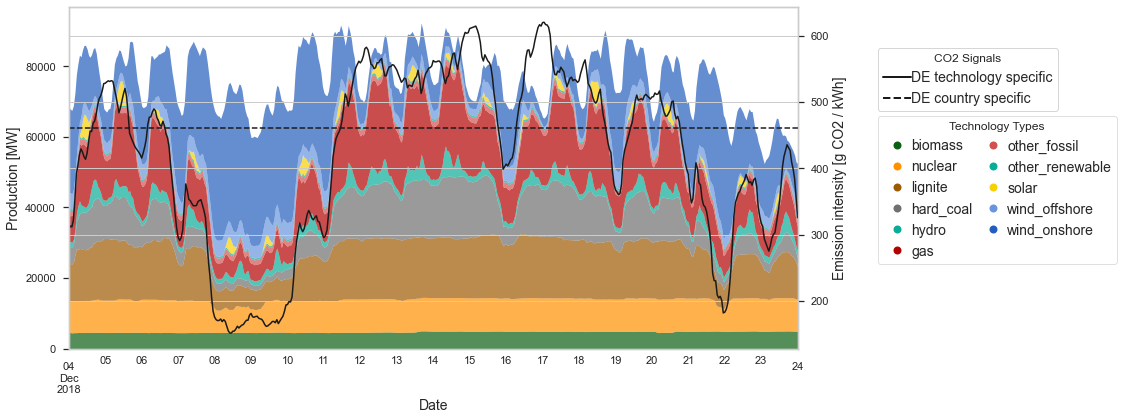

In [110]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'DE', start, end)

In [ ]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_DE.png'))

In [ ]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'PL', start, end)

In [ ]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_PL.png'))

In [ ]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'SK', start, end)

In [ ]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'DK', start, end)

### CO2 Duration Curves

In [ ]:
countries = Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns

In [ ]:
Carbon_intensitiy_entsoe_gen_type

#### One Figure

In [ ]:
fig, ax = plt.subplots()

for i in countries:    
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[i].sort_values(ascending=False), label = 'CO2 Duration curve')


    
ax.legend(countries ,loc='upper right')
ax.set_xlabel('hour')
ax.set_ylabel('g CO2 / kWh')
plt.title('CO2 Duration curve')
plt.show()

#### Multi sub Figures

In [ ]:
n_graphs = len(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns)
n_cols = 4
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

#fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
        
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[country].sort_values(ascending=False))
    ax.plot(range(0,8760), ([mean_Carbon_intensitiy_entsoe_gen_type[country]]*8760))
    
    ax.set_title(country, fontsize=12)
    ax.set_xlim(0,8760)
    ax.set_ylim(0,1000)
    
    ax.set_xticks([0,4380,8760])
        
    ax.set_xlabel("Hour of the year", fontsize=12)
    ax.set_ylabel("Emissions [g CO2/kWh]", fontsize=12)
    ax.set_aspect(8.760)
    fig.tight_layout()

handles = [Line2D([0], [0], color='C0', lw=2),
           Line2D([0], [0], color='C1', lw=2)
           ]
    
labels = ['Technology specific EF','Country specific EF']
    
l2 = ax.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 6.70),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Duration Curves', fontsize=12, title_fontsize= 14, frameon=True)



In [ ]:
fig.savefig(os.path.join(output_directory_path + '/CO2_duration_curve.png'),bbox_extra_artists=(l2,), bbox_inches='tight')

### Carbon Intensity Heat Map 

In [ ]:
# all countries
sns.heatmap(Carbon_intensitiy_entsoe_gen_type[countries].transpose(), cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.75, reverse=False, as_cmap=True))

In [ ]:
# use Germany as an aingle country example
df = Carbon_intensitiy_entsoe_gen_type['DE'].to_frame().copy()

In [ ]:
df.head()

In [ ]:
# def names for the heat map
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['hour']=df.index.hour
df['date']=df.index.date
df.head()

In [ ]:
# group the values
df1 = df.groupby(['month', 'hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

In [ ]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['month'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

In [ ]:
months=df1.month.unique().tolist()
print(months)

In [ ]:
heatmap_data=heatmap_data.loc[months]

In [ ]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title("Germany Mean CO2 Intensity", size=14)
plt.tight_layout()

# ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format

In [ ]:
def convert_ENTSOE_to_INATECH_type(ProductionTypeName):
    """
    Converts ENTSO-E Factsheet source names into INATECH technology type names.

    Parameters
    ----------
    ProductionTypeName : string
        ENTSO-E name of production type.

    Returns
    -------
    string
        INATECH names of production type.

    """
    
    return ProductionTypeName.replace({
            'Nuclear': 'nuclear',
            'Fossil Brown coal / Lignite': 'lignite',
            'Fossil Coal-derived gas': 'other_fossil',
            'Fossil Gas': 'gas',
            'Fossil Hard coal': 'hard_coal',
            'Fossil Oil': 'other_fossil',
            'Fossil Oil shale': 'other_fossil',
            'Fossil Peat': 'other_fossil',
            'Mixed fuels': 'other_fossil',
            'Other fossil fuels': 'other_fossil',
            'Hydro pure pumped storage': 'hydro',
            'Hydro mixed pumped storage ( non renewable part )': 'hydro',
            'Waste ( non renewable part )': 'other_fossil',
            'Other non-renewable': 'other_fossil',
            'Wind offshore': 'wind_offshore',
            'Wind onshore': 'wind_onshore',
            'Solar PV': 'solar',
            'Solar Thermal': 'solar',
            'Biomass': 'biomass',
            'Biogas': 'biomass',
            'Geothermal': 'other_renewable',
            'Renewable Waste': 'other_renewable',
            'Hydro Pure storage': 'hydro',
            'Hydro Run-of-river and pondage': 'hydro',
            'Hydro mixed pumped storage ( renewable part )': 'hydro',
            'Hydro Marine ( tidal / wave )': 'other_renewable',
            'Other renewable': 'other_renewable'}, inplace=False)

In [ ]:
FACT = pd.read_csv(input_directory_path + '/entsoe-statistical-factsheet-2018-stacked.csv', index_col=[1], header=[0], parse_dates=True)

FACT.drop(['capacity_MW'], axis=1, inplace=True)

# set filter and apply filter to datat
filter = ['Fossil fuels','Total NGC','Renewable net generation','Non renewable net generation','Not identified']
    
FACT.query('source not in @filter', inplace=True)

FACT.source.replace({'Of which ':''}, regex=True, inplace=True)

# change ProductionTypeNames into INATECH technology type names
FACT.source = convert_ENTSOE_to_INATECH_type(FACT.source)

In [ ]:
# reset index for groupby function
FACT.reset_index(inplace=True)
# group same production types
FACT = FACT.groupby(['source', 'year','country']).sum()
# set the old index for the dataframe
FACT = FACT.reset_index().set_index('year')

In [ ]:
# convert to MWh
FACT['generation_TWh'] = FACT['generation_TWh'] * 1000000

In [ ]:
FACT.rename(columns={'generation_TWh':'generation'}, inplace=True)

In [ ]:
FACT

In [ ]:
FACT =  pd.pivot_table(FACT, values='generation', index=FACT.index, columns=['country','source'])

In [ ]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in FACT.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [ ]:
# calculate emissions based on EF and generation per type
CO2_emission_FACT = FACT * EF_multi

In [ ]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_FACT = (CO2_emission_FACT * 1000000).groupby(level=0, axis=1).sum()
Generation_FACT = (FACT * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_FACT = CO2_emission_FACT.div(Generation_FACT)

In [ ]:


mean_Carbon_intensitiy_FACT = CO2_emission_FACT.loc['2018'].sum() / Generation_FACT.loc['2018'].sum()

In [ ]:
mean_Carbon_intensitiy_FACT

# ENTSO-E Power Stats generation per technology CO2 Signal

In [ ]:
MDV = pd.read_csv(input_directory_path + '/MDV_table.csv', index_col=[0], header=[0, 1], parse_dates=True)

In [ ]:
MDV.loc['2018'].head(5)

In [ ]:
# convert to MWh
MDV = MDV * 1000

In [ ]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in MDV.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [ ]:
# calculate emissions based on EF and generation per type
CO2_emission_MDV = MDV * EF_multi

In [ ]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_MDV = (CO2_emission_MDV * 1000000).groupby(level=0, axis=1).sum()
Generation_MDV = (MDV * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_MDV = CO2_emission_MDV.div(Generation_MDV)

In [ ]:
#take only year 2018
Carbon_intensitiy_MDV = Carbon_intensitiy_MDV.loc['2018']

In [ ]:


mean_Carbon_intensitiy_MDV = CO2_emission_MDV.loc['2018'].sum() / Generation_MDV.loc['2018'].sum()

In [ ]:
MDV['DE'].sum().sum()

In [ ]:
CI_top_down

# Compair Bottom Up and Top down

In [100]:
CI_top_down = pd.read_csv(os.path.join(processed_directory_path,'CI_top_down_methode.csv'), index_col=0)
#CI_top_down.rename(columns={'UK':'GB'}, inplace = True)

In [101]:
CI_compar = pd.DataFrame()
CI_compar.index.rename('country',inplace=True)

In [102]:
CI_compar.index

Index([], dtype='object', name='country')

In [103]:
CI_compar['CI_top_down_ref'] = CI_top_down.loc[2018].filter(mean_Carbon_intensitiy_entsoe_gen_type.index.to_list())

In [104]:
CI_compar['CI_bottom_up'] = mean_Carbon_intensitiy_entsoe_gen_type.filter(CI_compar.index.to_list())
CI_compar['diff_bottom_up'] =CI_compar['CI_bottom_up'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_bottom_up_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_bottom_up'])

In [107]:
CI_compar

,CI_top_down_ref,CI_bottom_up,diff_bottom_up,diff_bottom_up_pro
country,,,,
AT,100.120593,130.479772,30.359179,30.0
BE,205.448187,166.077565,-39.370622,-19.0
BG,422.058675,497.366275,75.307600,18.0
CY,661.739128,480.000000,-181.739128,-27.0
CZ,442.564283,571.954593,129.390310,29.0
DE,398.932178,460.222653,61.290475,15.0
DK,185.037765,276.517449,91.479684,49.0
EE,895.026279,431.372549,-463.653730,-52.0
ES,273.631418,277.407882,3.776464,1.0


In [ ]:



CI_compar['CI_MDV'] = mean_Carbon_intensitiy_MDV
CI_compar['CI_FACT'] = mean_Carbon_intensitiy_FACT

CI_compar['diff_MDV'] =CI_compar['CI_MDV'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_FACT'] =CI_compar['CI_FACT'] -  CI_compar['CI_top_down_ref']


CI_compar['diff_MDV_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_MDV'])

CI_compar['diff_FACT_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_FACT'])


In [ ]:
entsoe_gen_type['SE'].sum()/1000

In [ ]:
mean_Carbon_intensitiy_entsoe_gen_type['SE'].sum()/1000

In [ ]:
CI_compar
#gründe warum CI_bottom up zu hoch
# DK wärme wird dort viel von Kraftwerken genutzt
# EE hat ganz viel other fossil (wir haben keine EF ausgerechnet)
# LT
# LV
# NO

Information about the data shown. The reference value shown here is not an official value, but can be used as a reference, since it is based on a documented and freely available method. 

In [ ]:
energy_comp = pd.DataFrame()

energy_comp['MDV'] = MDV['2018'].sum()

In [ ]:
energy_comp['entsoe'] = entsoe_gen_type.sum()

In [ ]:
energy_comp['diff'] = energy_comp['MDV'] - energy_comp['entsoe']
energy_comp['missing_pro'] = round((100 / energy_comp['MDV']) * energy_comp['diff'])

In [ ]:
energy_comp.loc['DE']

In [ ]:
ember_CF = pd.read_csv(os.path.join(input_directory_path,'ember_EF.csv'))

# Plotting CI

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world[world.name == 'Germany']

In [ ]:
import pycountry



In [ ]:
pycountry.countries.search_fuzzy('Norway')

In [ ]:
import numpy as np


def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

world["country_code"] = world["name"].apply(lambda country: do_fuzzy_search(country))

In [ ]:
world.set_index('country_code', inplace=True)

In [ ]:
world['CI'] = Carbon_intensitiy_entsoe_gen_type.mean()

In [ ]:
world[world.name == 'France']

In [ ]:
world.plot(column='CI')

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

fig.suptitle("Density difference plot for " + country, fontsize=16)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='CI',
           ax=ax,
           cax=cax,
           legend=True,
           legend_kwds={'label': "Capacity density diff per NUTS region [MW/km²]", 'orientation': "vertical"},
           cmap='Blues',
           edgecolor='k')


ax.text(0.05, 0.05,'Mean Cap. difference ' + str(round(world.CI.mean())) + ' [MW]',\
        ha='left', va='center', transform=ax.transAxes, fontsize=15, color='white',\
        bbox={'facecolor': 'royalblue', 'alpha': 0.5, 'pad': 5})

ax.title.set_text('Density difference plot for capacities in the NUTS regions')


# Export final CO2 signals

In [ ]:
Carbon_intensitiy_entsoe_gen_type.to_csv(processed_directory_path + '/CI_bottom_up_methode.csv')
Carbon_intensitiy_entsoe_gen_type.to_csv(output_directory_path + '/CI_bottom_up_methode.csv')

# Plottting 

In [ ]:
CI_compar.index

In [ ]:
import numpy as np
# Create a dataframe
#value1=np.random.uniform(size=20)
#value2=value1+np.random.uniform(size=20)/4
#df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })

CI_compar

# Reorder it following the values of the first value:
ordered_df = CI_compar.sort_values(by='CI_bottom_up')
my_range=range(1,len(CI_compar.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['CI_top_down_ref'], xmax=ordered_df['CI_bottom_up'], color='grey', alpha=0.4)
plt.scatter(ordered_df['CI_top_down_ref'], my_range, color='skyblue', alpha=1, label='CI_top_down_ref')
plt.scatter(ordered_df['CI_bottom_up'], my_range, color='green', alpha=0.4 , label='CI_bottom_up')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Comparison of the CI_top_down_ref and the CI_bottom_up", loc='left')
plt.xlabel('Value of the variables')
#plt.ylabel(ordered_df.index)

In [ ]:
df